# **Bank Marketing DataSet - Intelligent Targeting**

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. Some important aspects of a marketing campaign are as follows: 

**Segment of the Population:** To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. 

**Distribution channel to reach the customer's place:** Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.) 

**Promotional Strategy:** This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an in-depth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

You are leading the marketing analytics team for a banking institution. There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

You are provided a dataset containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. Can you help the bank to predict accurately whether the customer will subscribe to the focus product for the campaign - Term Deposit after the campaign?

## Data Description

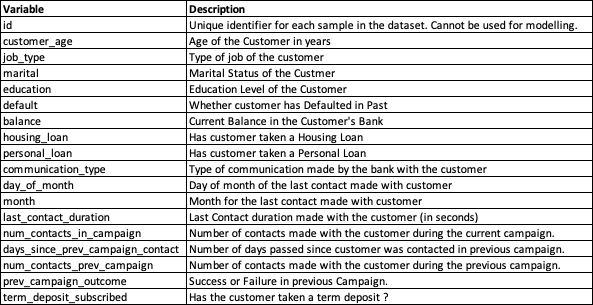

* We can see that variables 1 to 16 can be used for modelling. 
* Variable '**id**' is Identifier column. It has a unique value for every sample in the dataset and cannot be used for modelling.
* Variable '**term_deposit_subscribed**' is Target/y column. It has binary values and we need to learn to predict this variable given our above 16 variables as features.

#### **Hypothesis Generation**
Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.

* Are younger customers more likely to subscribe to a term deposit as compared to old customers ?

* Are people with a higher bank balance more likely subscribe to term deposit than people with low balance ?

* Does a married person have higher chances to subscribe to a term deposit compared to a single or divorced person ? 

* Does the length of the call made to the customers tell us anything about their chances of subscribing ?
(One may think that if the call length is longer, the customer executive has spent a longer time, discussing details with customer, hence the customer is more likely to subscribe).

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

# **EDA**

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.  

We have been provided three files. A description for what each of these files contain is given below:


1.     **SampleSubmission.csv**: This gives us a required format for submitting our solutions to the AV solution checker.
2.     **Train.csv**: We will use this file for training our model. It contains variables or features that we will input to our model, and the *target variable* that we want to predict.
3.     **Test.csv**: This will contain all variables in the training dataset except the *target variable*. We will use our trained model to predict the target for this dataset. 


Now lets go on to read and have a look at each of the files.

In [152]:
ss = pd.read_csv('../input/avguided-community-hackathon2020term-deposit/SampleSubmission_XkIpo3X.csv')
train = pd.read_csv('../input/avguided-community-hackathon2020term-deposit/Train_eP48B9k.csv')
test = pd.read_csv('../input/avguided-community-hackathon2020term-deposit/Test_jPKyvmK.csv')

In [153]:
ss.head(20)

,id,term_deposit_subscribed
0,id_17231,0
1,id_34508,0
2,id_44504,0
3,id_174,0
4,id_2115,0
5,id_20153,0
6,id_20552,0
7,id_26080,0
8,id_45165,0
9,id_28373,0


Our sample submission file contains two columns: 'id' and 'term_deposit_subscribed'. We will use the same format to submit to AV. We don't need the ss for now, we will get back to it once we have completed our modelling and predicting phase.

Lets go and explore our training and test datasets. We will do the following steps:

1. Brief Look at the Dataset
2. See the dataset shape.
3. Target Distribution.
4. See the variables datatypes.
5. See the number of missing/null values.
6. See the number of unique values in each variable. 


#### **1. Brief look at the dataset**.

In [154]:
train.head(3)
test.head(3)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown


In [155]:
ID_COL, TARGET_COL = 'id', 'term_deposit_subscribed'

#### **2. Dataset Shape (Number of Samples and Variables in the dataset)**

In [156]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 31647 samples and 18 variables

Test contains 13564 samples and 17 variables

The dataset contains 16 features


#### 3. **Target Distribution**

This is a binary classification problem. Lets have a look at the number of positive and negative examples that we have, or in our problem statement terms: '*Number of People who did subscribe for a term deposit and the number of people who did not'*

In [157]:
train[TARGET_COL].value_counts(normalize=True)

0    0.892754
1    0.107246
Name: term_deposit_subscribed, dtype: float64

Visually we are able to see communicate things more clearly and graphs help us do that. Lets visualize the same target distribution in a countplot.

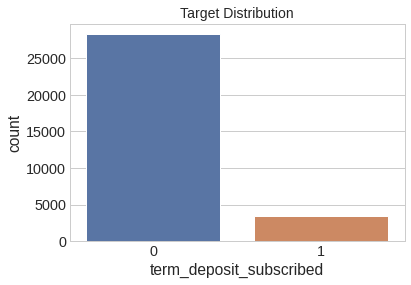

In [158]:
_ = sns.countplot(train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

Quite obviously dataset is very imbalanced. Only about 10 % of the examples are positive.

####**4. Variable Datatypes**

Lets have a look at the kind of data types that is being used to store the variables in pandas.

pandas info() method on dataframe allows to do that. For each variable we can see the number of non-null values along with their datatypes.



In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

Looks like we have a mixture of datatypes, a lot of these variables are object datatypes. Object datatypes are used to store strings along with other non-numeric data. This is obvious since we encountered a lot of strings when we had a look at the dataset.

Machine Learning Models understand only numbers so we will have to later convert these strings to numbers

#### **5. Null Values**

Although the info() function did tell us about non-null values ideally we want to have a look at the percentage of null values in each variable.

In [160]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

days_since_prev_campaign_contact    81.6
customer_age                        2.0 
balance                             1.3 
last_contact_duration               1.0 
personal_loan                       0.5 
marital                             0.5 
num_contacts_in_campaign            0.4 
job_type                            0.0 
education                           0.0 
default                             0.0 
term_deposit_subscribed             0.0 
housing_loan                        0.0 
prev_campaign_outcome               0.0 
communication_type                  0.0 
day_of_month                        0.0 
month                               0.0 
num_contacts_prev_campaign          0.0 
id                                  0.0 
dtype: float64

One feature 'days_since_prev_campaign_contact' has a lot of null values around 81.6 %, which might mean that these customers were never reached out in the previous campaign, there are few missing values in customer age, balance, last contact duration, personal loan, marital status & number of contacts in campaign

#### **6. Unique values in each variable**

In [161]:
train.nunique()

id                                  31647
customer_age                        77   
job_type                            12   
marital                             3    
education                           4    
default                             2    
balance                             6563 
housing_loan                        2    
personal_loan                       2    
communication_type                  3    
day_of_month                        31   
month                               12   
last_contact_duration               1447 
num_contacts_in_campaign            46   
days_since_prev_campaign_contact    511  
num_contacts_prev_campaign          41   
prev_campaign_outcome               4    
term_deposit_subscribed             2    
dtype: int64

The numerical features 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign' contain a lot of unique values which is quite obvious.

Similarly 'day_of_month' contains 31 unique values for each of 31 possible days in a month. Month from January to December contains '12' unique values.

### **Analyzing Each Variable & their relationships**

There are two types of features that we have:

1. Categorical
2. Numerical

Also our target is Binary

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'term_deposit_subscribed'


But before jumping straight into analysis, lets have a look at the variables we had and try to ask some questions ourselves



In [162]:
train.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

### Segregating Categorical & Numerical Variables

In [163]:
cat_cols = ['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [164]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

#### **Categorical Features**

#### **Univariate Analysis - Pie Charts.**

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

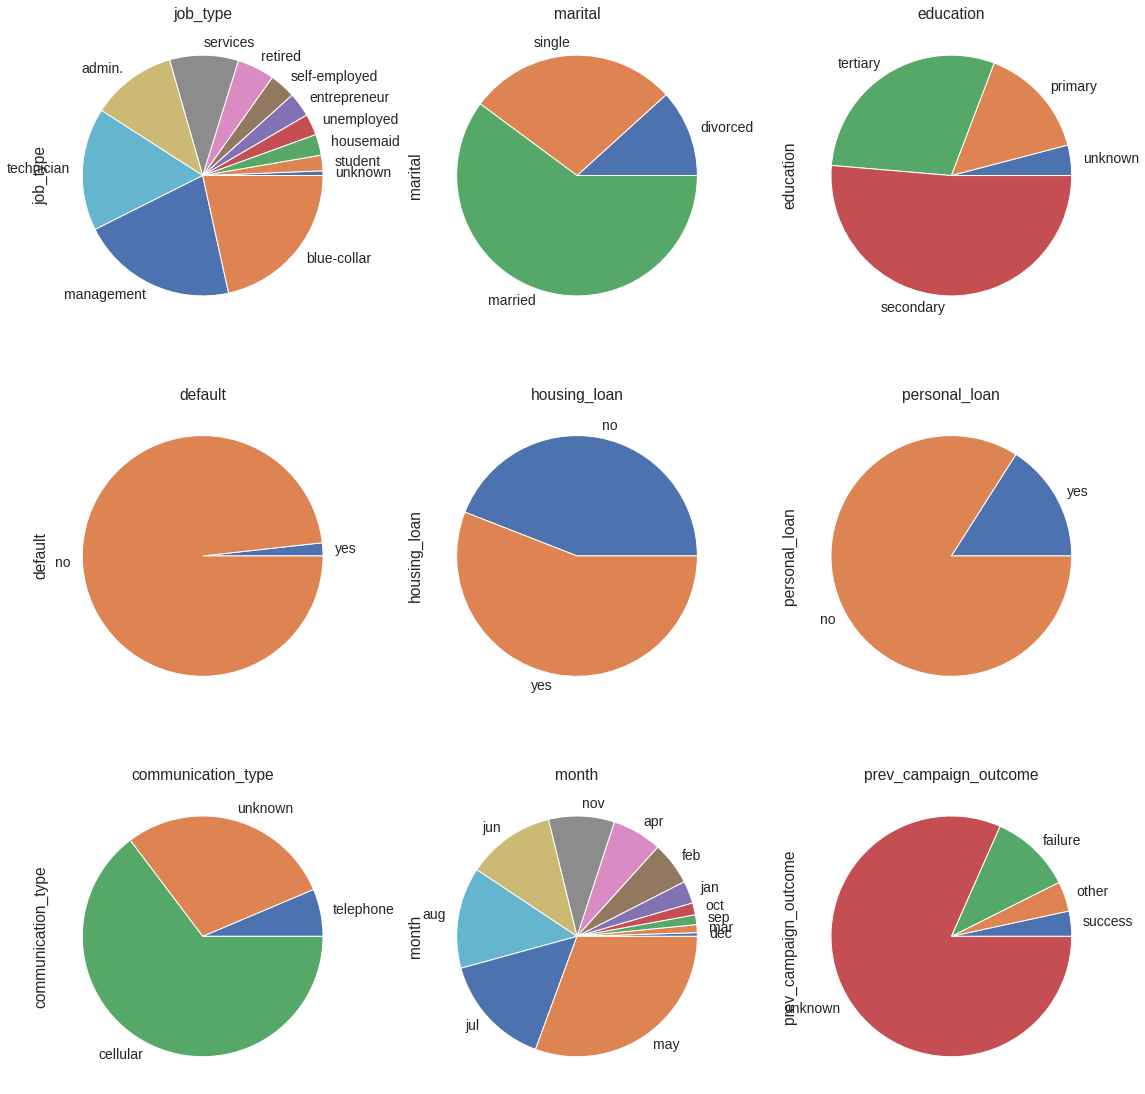

In [165]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

#### **Univariate Analysis - CountPlots**

Another way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable

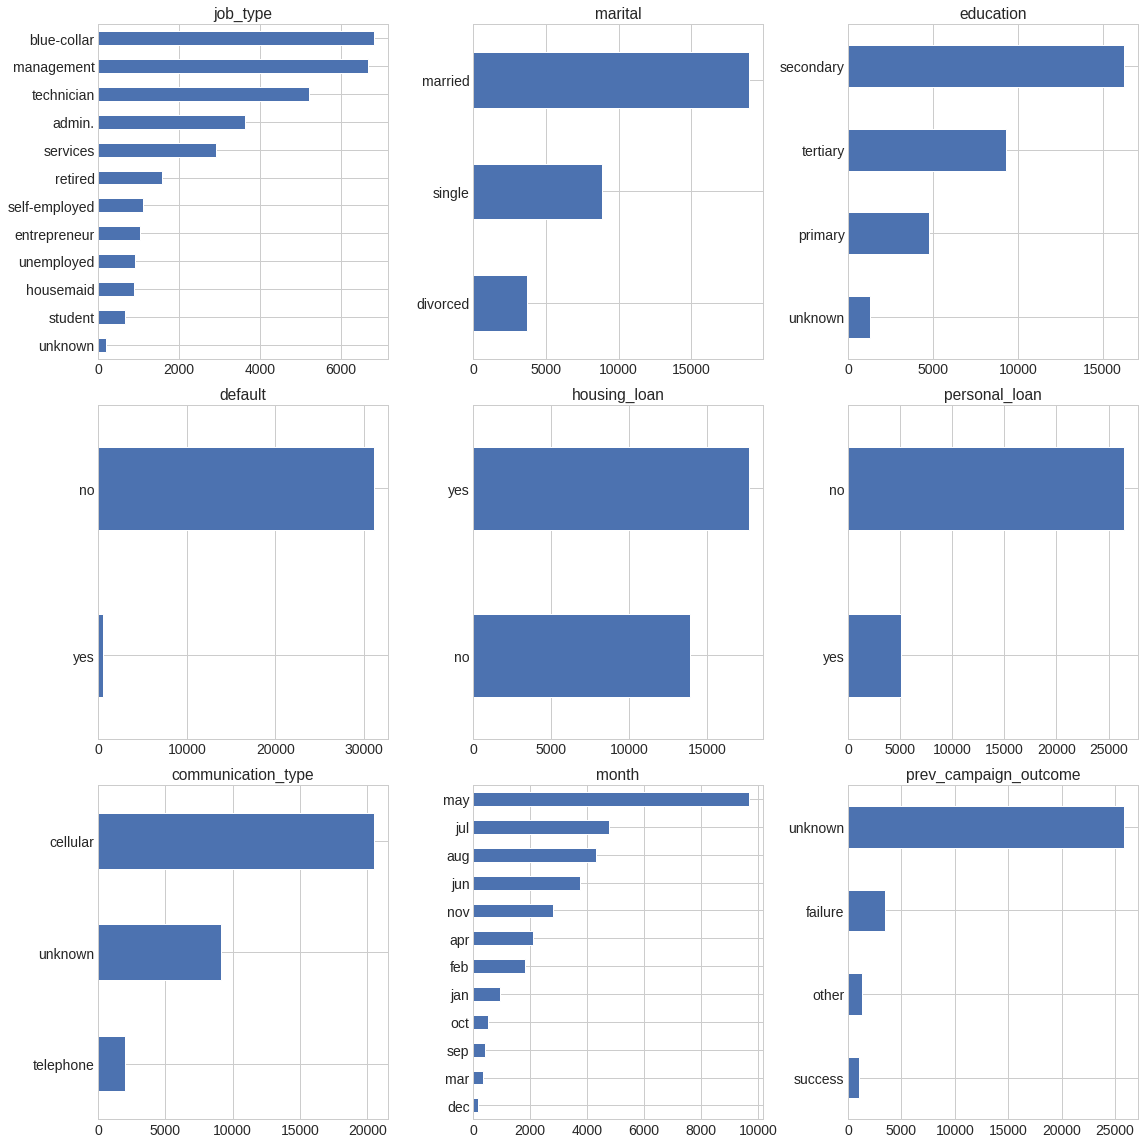

In [166]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

##### **Bivariate Analysis Relationships with Target**

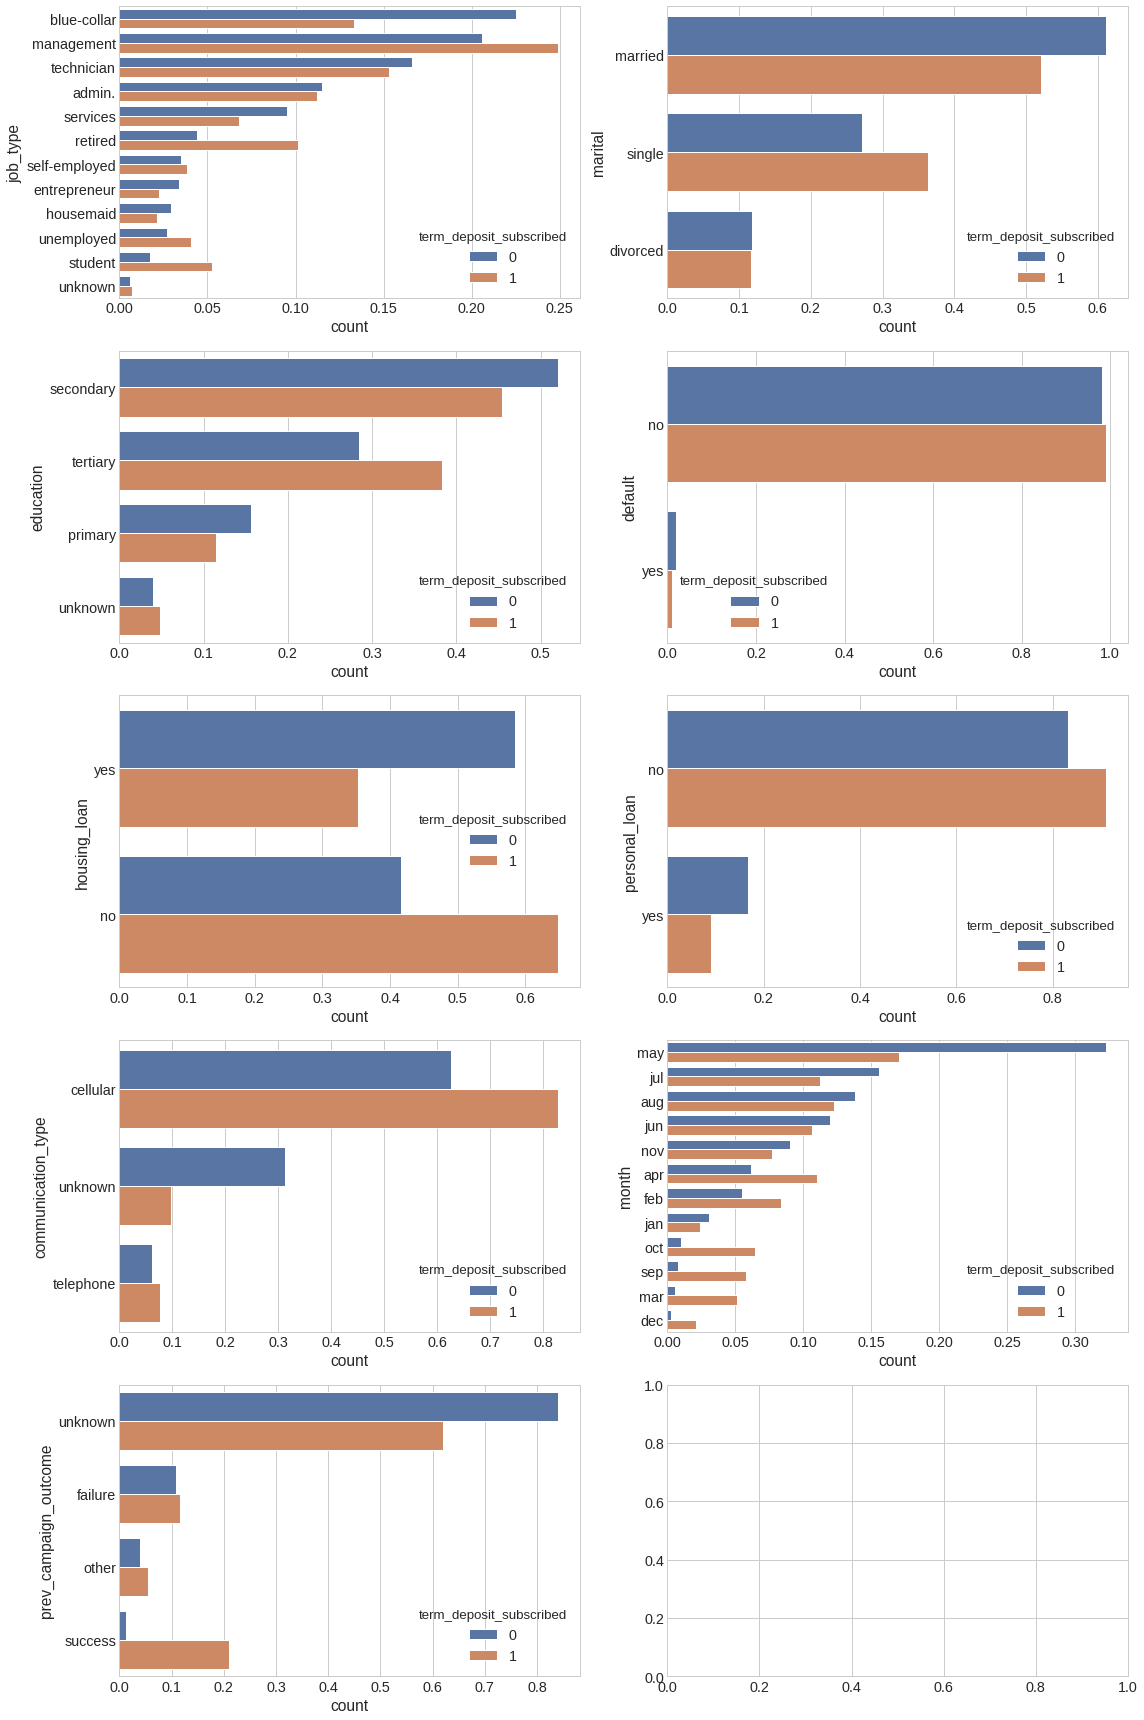

In [167]:

fig, axes = plt.subplots(5, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    fltr = train[TARGET_COL] == 0
    vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

**Married people have more chances of subscribing to a term deposit ?**


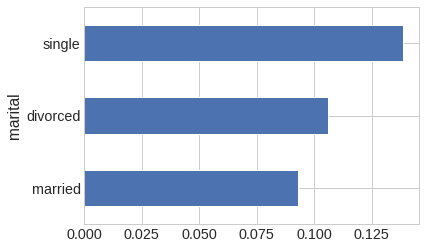

In [168]:
_ = train.groupby('marital')[TARGET_COL].mean().sort_values().plot(kind = 'barh')

The data tells us quite a different story than our initial thought process, single people are the more likely to subscribe to a term deposit. 

#####  **Univariate Analysis - Boxplots**

Boxplot can be used to see the spread of the numerical variables, and identify outliers



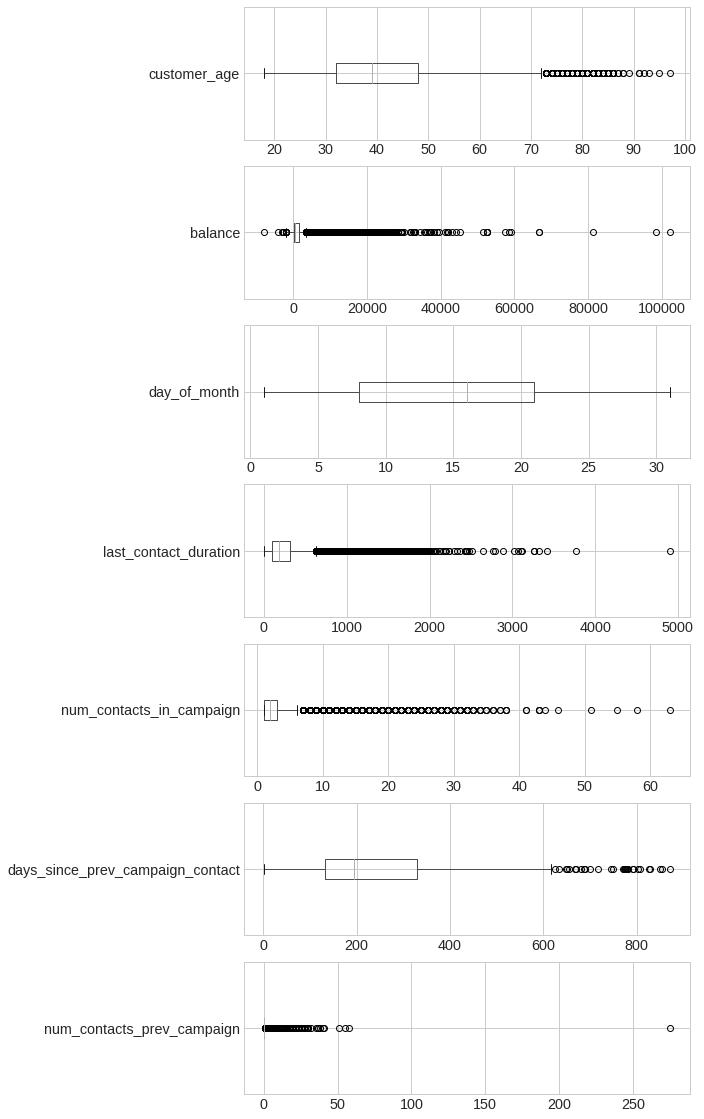

In [169]:
fig, axes = plt.subplots(7, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

##### **4. Bivariate Analysis - Horizontal BarPlots**

For each numerical Variable. We will plot the median of the numerical variable for:


1. When term_deposit_subscribed == 0
2. when term_deposit_subscribed == 1

**We are choosing median since median is not affected by outliers**, and our data has a lot of outlers

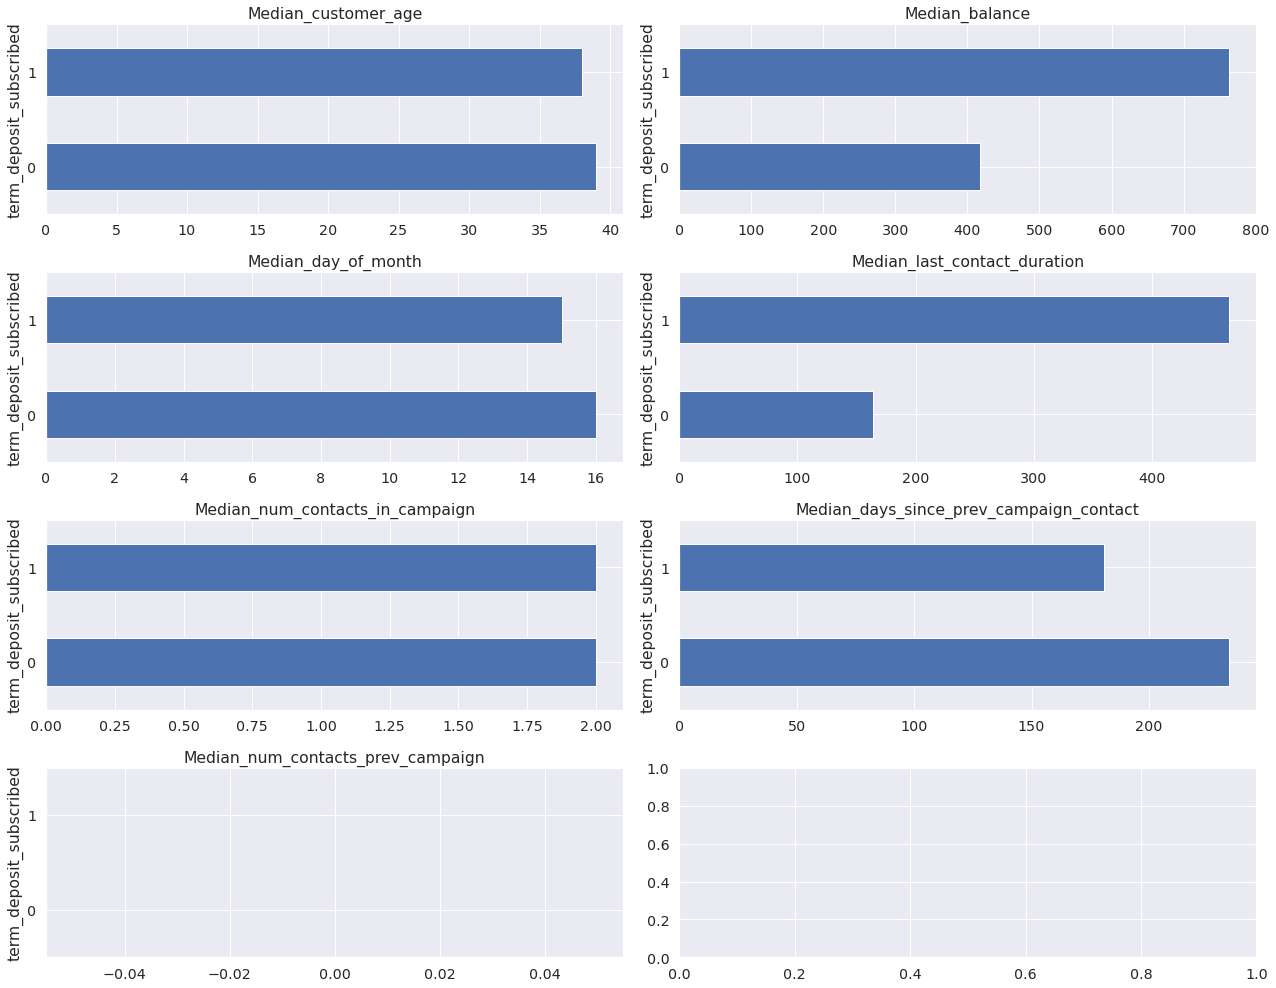

In [170]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = train.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

**Q. Do people with a higher bank balance more likely subscribe to term deposit than people with low balance ?**

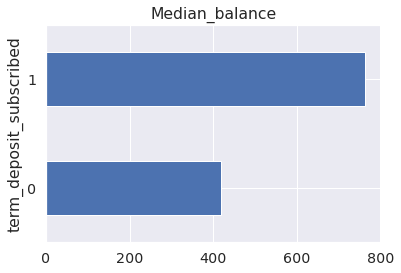

In [171]:
_ = train.groupby(TARGET_COL)['balance'].median().plot(kind = 'barh', title=f'Median_balance')

If you see the plot above median balance of customers not subscribing to a term deposit is around 400 whereas median balance of customers subscribing to a term deposit is 800. This definitely supports our initial hypothesis.

**Q. Does the length of the call made to the customers tell us anything about their chances of subscribing ?**

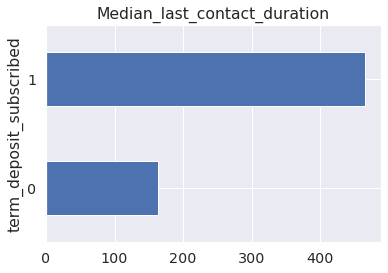

In [172]:
_ = train.groupby(TARGET_COL)['last_contact_duration'].median().plot(kind = 'barh', title=f'Median_last_contact_duration')

From the plot above median last_call_duration made to the customers not subscribing to a term deposit is around 150 seconds. Median last_call_duration made to the customers subscribing to a term deposit is around 450 seconds. So yes our hypothesis seems true.

**Q. Are younger customers more likely to subscribe to a term deposit compared to old customers ?**

It's not very clear from our above plot since we have median age of around 40 for both cases

Lets dig deeper.

We will define:
 old as Age > 60
 Not Old as Age <= 60

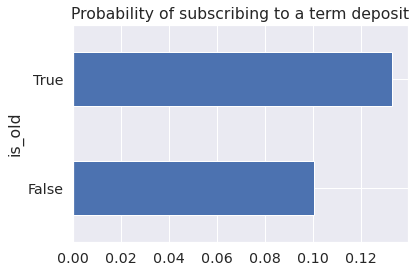

In [173]:
train['is_old'] = True
train.loc[train['customer_age'] <= 50, 'is_old'] = False

_ = train.groupby('is_old')[TARGET_COL].mean().sort_values().plot(kind = 'barh', title='Probability of subscribing to a term deposit')

Looks like old age customers are definitely more likely to subscribe to a term deposit compared to younger age customers

In [174]:
train=train.drop(['is_old'],axis=1)

##### **5. Bivariate Analysis - Correlation Heatmaps**

<Figure size 1008x576 with 0 Axes>

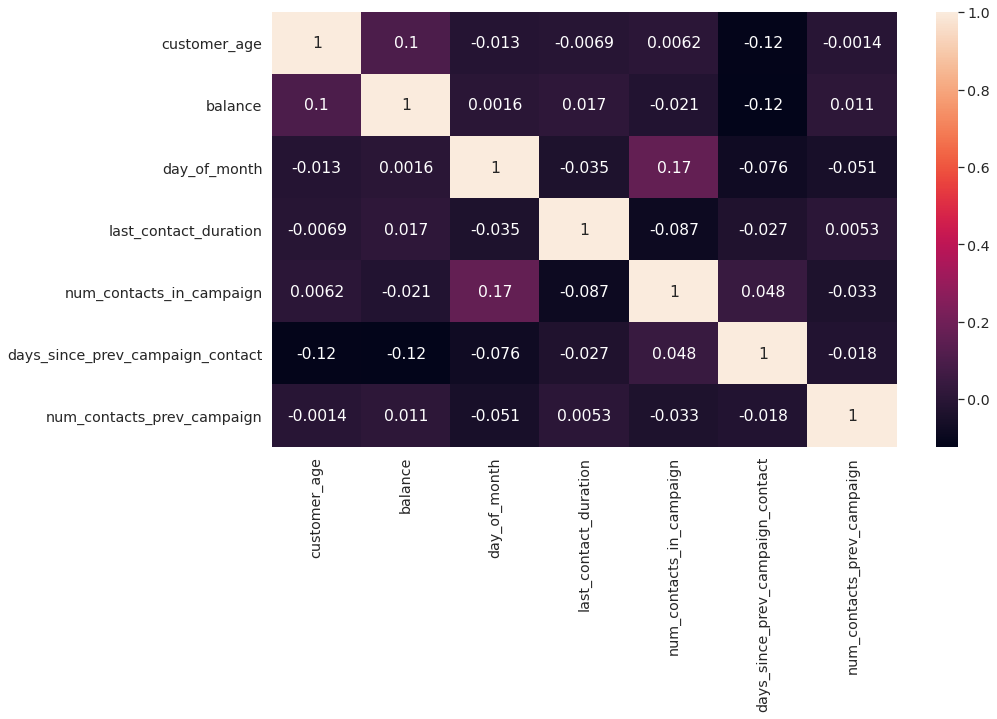

In [175]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

# Metric and Baseline Model

**F1 Score**


In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.

The F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. 



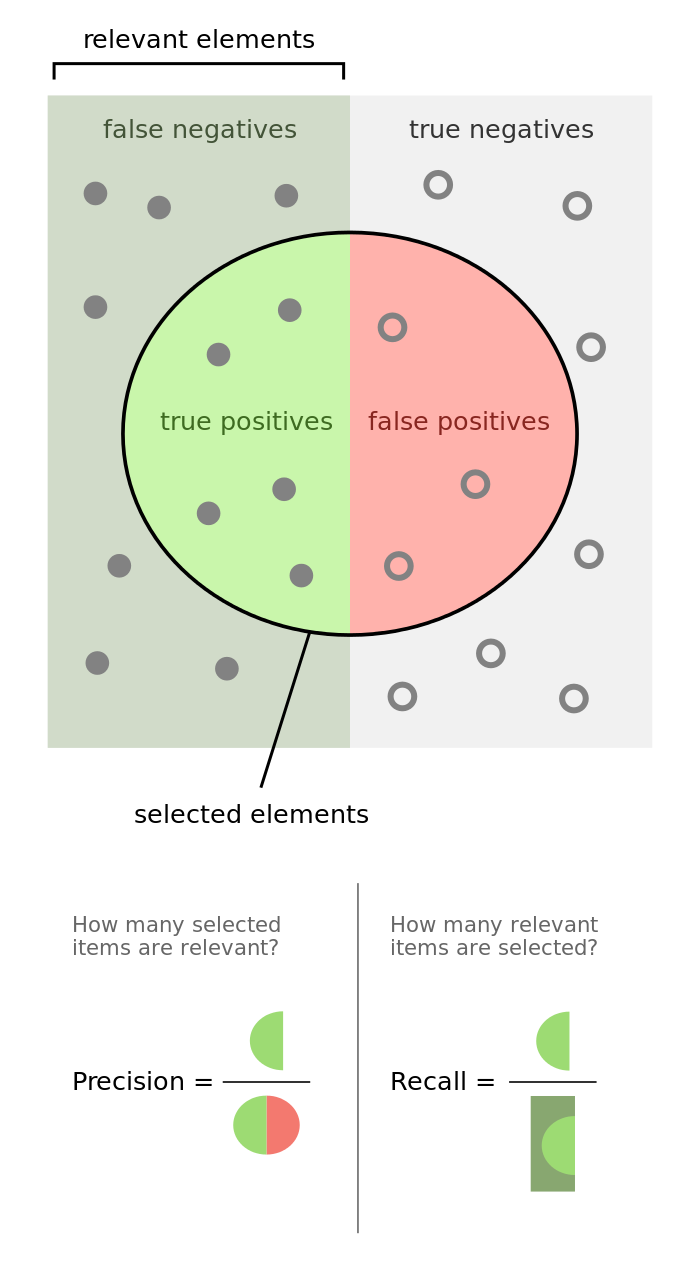


## **Baseline Models**

**Helper Function to Download Test Predictions as CSV**

In [176]:
ss.head()

,id,term_deposit_subscribed
0,id_17231,0
1,id_34508,0
2,id_44504,0
3,id_174,0
4,id_2115,0


In [177]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv("file_name.csv", index = False)

# Merge train and test dataset

In [178]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df.shape

(45211, 18)

In [179]:
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0.0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0.0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0.0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0.0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0.0


# Imputing missing values

In [191]:
for column in cat_cols:
    mode = df[column].mode()[0]
    df[column] = df[column].replace('unknown',mode)
    df[column] = df[column].replace('nan',mode)

In [192]:
for column in num_cols:
    median = df[column].median()
    df[column].fillna(median,inplace = True)
    df[column] = df[column].replace('NaN',median)

Encoding data using Label Encoding

In [193]:

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in cat_cols:
    try:
        df[feature] = le.fit_transform(df[feature])
    except:
        print('Error encoding '+feature)


In [194]:
df['marital']=df['marital'].replace({'single':0,'married':1,'divorced':2})
df['personal_loan']=df['personal_loan'].replace({'yes':1,'no':0})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [195]:
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,4,0,2,0,285.0,1,0,0,26,6,303,4,194,0,3,0.0
1,id_32289,34.0,1,1,1,0,934.0,0,1,0,18,9,143,2,132,1,1,0.0
2,id_10523,46.0,9,1,1,0,656.0,0,0,0,5,3,101,4,194,0,3,0.0
3,id_43951,34.0,7,0,1,0,2.0,1,0,0,20,8,127,3,194,0,3,0.0
4,id_40992,41.0,1,1,0,0,1352.0,1,0,0,13,8,49,2,194,0,3,0.0


In [196]:
df.dtypes

id                                  object 
customer_age                        float64
job_type                            int64  
marital                             int64  
education                           int64  
default                             int64  
balance                             float64
housing_loan                        int64  
personal_loan                       int64  
communication_type                  int64  
day_of_month                        int64  
month                               int64  
last_contact_duration               int64  
num_contacts_in_campaign            int64  
days_since_prev_campaign_contact    int64  
num_contacts_prev_campaign          int64  
prev_campaign_outcome               int64  
term_deposit_subscribed             float64
dtype: object

In [197]:
df['days_since_prev_campaign_contact']=df['days_since_prev_campaign_contact'].astype(int)
df['num_contacts_in_campaign']=df['num_contacts_in_campaign'].astype(int)
df['last_contact_duration']=df['last_contact_duration'].astype(int)
df['personal_loan']=df['personal_loan'].astype(int)
df['balance']=df['balance'].astype(int)
df['marital']=df['marital'].astype(int)
df['customer_age']=df['customer_age'].astype(int)

# Process data back to train and test

In [198]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

# Splitting train data into train and evaluation data

In [199]:
# Predictors
X = train_proc[features]

# Target
y = train_proc[TARGET_COL]

# Dividing the data into train and test subsets
x_train,x_eval,y_train,y_eval = train_test_split(X,y,test_size=0.25,random_state=150300)


In [200]:
X.head(2)
y.head(2)

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,28,4,0,2,0,285,1,0,0,26,6,303,4,194,0,3
1,34,1,1,1,0,934,0,1,0,18,9,143,2,132,1,1


0    0.0
1    0.0
Name: term_deposit_subscribed, dtype: float64

# Logistic Baseline Model

In [201]:
# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(x_train, y_train)
# predicting the values
y_scores = model.predict(x_eval)
# f1 score
score = f1_score(y_scores, y_eval)
# print
print("Logistic Regression F1 score: {:.2f}".format(score))


LogisticRegression()

Logistic Regression F1 score: 0.33


# Decision tree Baseline Model

In [202]:
from sklearn.tree import DecisionTreeClassifier
# Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_eval)
# f1 score
score = f1_score(y_scores, y_eval)
# print
print("Decision Trees F1 score: {:.2f}".format(score))
    


DecisionTreeClassifier()

Decision Trees F1 score: 0.49


# Random Forest Baseline Model

In [203]:
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
# run Random Forrest Classifier
params={'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2'}

    
# Applying Smote on train data for dealing with class imbalance

model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_eval)

# f1 score
score = f1_score(y_scores, y_eval)
# print
print("RandomForestClassifier F1 score: {:.2f}".format(score))
    


RandomForestClassifier()

RandomForestClassifier F1 score: 0.51


# Light GBM Classifier

In [204]:
params = {}
params['learning_rate'] = 0.01
params['max_depth'] = 50
params['n_estimators'] = 500
params['objective'] = 'binary'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 50
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.6
params['reg_lambda'] = 1.1

In [205]:
clf = LGBMClassifier(**params)
clf.fit(x_train, y_train)
predparams= clf.predict(x_eval)
# f1 score
score = f1_score(predparams, y_eval)
# print
print("Light GBM F1 score: {:.2f}".format(score))

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=50,
               min_data_in_leaf=55, n_estimators=500, objective='binary',
               random_state=50, reg_alpha=1.6, reg_lambda=1.1, subsample=0.7)

Light GBM F1 score: 0.50


# Apply Stratified K fold

In [206]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = f1_score(y_val, preds_val.round())
    print(f'\nF1 score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = f1_score(target, oofs.round())
  print(f'\n\nF1 score for oofs is {oofs_score}')

  return oofs, preds

# Hacking F1_Score or Threshold optimization

In [207]:
target = train[TARGET_COL]

In [208]:
clf = LGBMClassifier()
lgb_oofs, lgb_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------

F1 score for validation set is 0.5657237936772047

------------- Fold 2 -------------

F1 score for validation set is 0.5887300252312868

------------- Fold 3 -------------

F1 score for validation set is 0.5240101095197978

------------- Fold 4 -------------

F1 score for validation set is 0.5531197301854974

------------- Fold 5 -------------

F1 score for validation set is 0.5431472081218273


F1 score for oofs is 0.554994954591322


In [209]:
thresholds = np.arange(0, 100)/100
for thresh in thresholds:
  oofs_rounded = (lgb_oofs > thresh) * 1
  thresh_score = f1_score(target, oofs_rounded)
  print(f'Threshold {thresh}: {thresh_score}')

Threshold 0.0: 0.19371593276447588
Threshold 0.01: 0.36336271769511935
Threshold 0.02: 0.4402490986561783
Threshold 0.03: 0.4842964366392189
Threshold 0.04: 0.5128723652485029
Threshold 0.05: 0.5345207941825312
Threshold 0.06: 0.5512613607406779
Threshold 0.07: 0.5649658074697527
Threshold 0.08: 0.5773363431151242
Threshold 0.09: 0.5869927737632018
Threshold 0.1: 0.5943084050297817
Threshold 0.11: 0.6007333076032421
Threshold 0.12: 0.6040400078446754
Threshold 0.13: 0.6099262507474587
Threshold 0.14: 0.6140919214415874
Threshold 0.15: 0.6169972253622443
Threshold 0.16: 0.6204090150250418
Threshold 0.17: 0.6231038506417735
Threshold 0.18: 0.6261692291151489
Threshold 0.19: 0.6285464862505455
Threshold 0.2: 0.6287862038470042
Threshold 0.21: 0.6297748403719055
Threshold 0.22: 0.6309334544628663
Threshold 0.23: 0.6320396176436714
Threshold 0.24: 0.6324646488255229
Threshold 0.25: 0.6347702510658456
Threshold 0.26: 0.6340819022457067
Threshold 0.27: 0.6346550260700862
Threshold 0.28: 0.634

In [210]:
def get_optimal_f1_thresh(target, oofs):
  thresholds = np.arange(0, 100)/100
  thresh_scores = []
  for thresh in thresholds:
    oofs_rounded = (lgb_oofs > thresh) * 1
    thresh_score = f1_score(target, oofs_rounded)
    thresh_scores.append(thresh_score)
  
  all_thresholds_and_scores = pd.Series(index = thresholds, data = thresh_scores)
  all_thresholds_and_scores.plot(figsize=(10, 6), fontsize=14)
  
  plt.xlabel('Threshold', fontsize=14)
  plt.ylabel('F1 Score', fontsize=14)

  return all_thresholds_and_scores.sort_values(ascending=False).index.values[0]

Optimal threhold is 0.3


0.6349086326402018

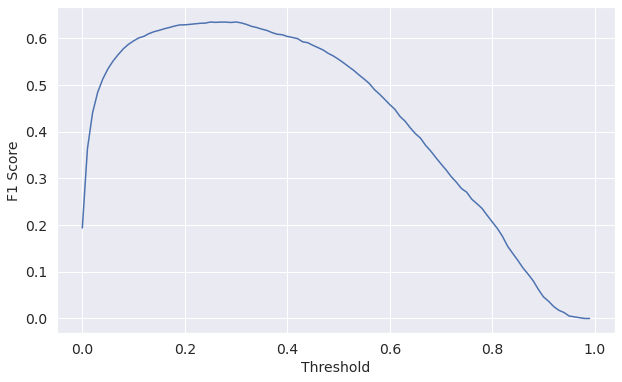

In [211]:
optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
f1_score(target, (lgb_oofs > optimal_thresh) * 1)

# Gradient Boosting 

In [212]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train_proc))
  preds = np.zeros((len(test_proc)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = f1_score(y_val, preds_val.round())
    print(f'\nF1 score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = f1_score(target, oofs.round())
  print(f'\n\nF1 score for oofs is {oofs_score}')

  return oofs, preds

# Cat Boost Classifier


------------- Fold 1 -------------
0:	learn: 0.6671215	test: 0.6671603	best: 0.6671603 (0)	total: 13.5ms	remaining: 33.6s
200:	learn: 0.1908392	test: 0.1912899	best: 0.1912899 (200)	total: 2.83s	remaining: 32.4s
400:	learn: 0.1746057	test: 0.1809605	best: 0.1809605 (400)	total: 5.75s	remaining: 30.1s
600:	learn: 0.1644518	test: 0.1773085	best: 0.1773085 (600)	total: 8.56s	remaining: 27s
800:	learn: 0.1553038	test: 0.1745882	best: 0.1745882 (800)	total: 11.4s	remaining: 24.2s
1000:	learn: 0.1478916	test: 0.1726308	best: 0.1726181 (998)	total: 14.4s	remaining: 21.5s
1200:	learn: 0.1419979	test: 0.1718777	best: 0.1718460 (1198)	total: 17.3s	remaining: 18.7s
1400:	learn: 0.1368807	test: 0.1713916	best: 0.1713885 (1399)	total: 20.1s	remaining: 15.7s
1600:	learn: 0.1318085	test: 0.1712119	best: 0.1712119 (1600)	total: 22.9s	remaining: 12.9s
1800:	learn: 0.1271044	test: 0.1709540	best: 0.1709540 (1800)	total: 25.7s	remaining: 9.99s
2000:	learn: 0.1229974	test: 0.1710054	best: 0.1709043 (1948

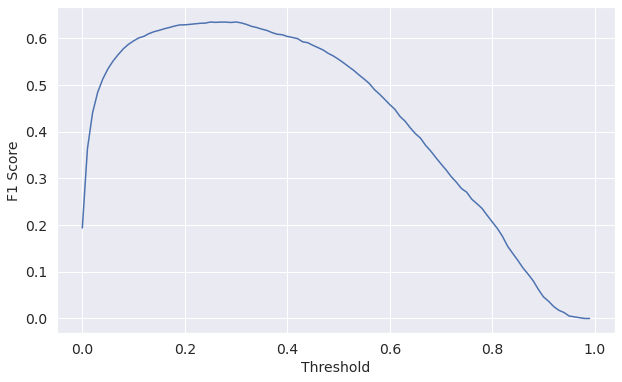

In [213]:
clf = CatBoostClassifier(n_estimators = 2500,
                         learning_rate = 0.02,
                       rsm = 0.4, 
                       random_state=101300,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)
optimal_thresh = get_optimal_f1_thresh(target, cb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (cb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')


In [ ]:
lgb_preds_rounded = (cb_preds > optimal_thresh) * 1
download_preds(lgb_preds_rounded, file_name = 'hacklive_submission.csv')

# ***********Do Upvote if you find this notebook helpful***********